In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
# Đọc file CSV
file_path = 'FPT_Historical_Data.csv'  # Đường dẫn đến file CSV của bạn
data = pd.read_csv(file_path)

# Chuyển đổi cột 'Date' thành datetime và sắp xếp dữ liệu
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%y')
data.sort_values('Date', inplace=True)

data


,Date,Close,Open,High,Low,Vol.,Change %
0,2017-01-03,16158.2,15960.1,16194.3,15960.1,2.34M,1.93%
1,2017-01-04,16302.3,16140.2,16464.5,16104.2,2.36M,0.89%
2,2017-01-05,16248.3,16284.3,16356.4,16248.3,1.42M,-0.33%
3,2017-01-06,16194.3,16284.3,16392.4,16194.3,1.85M,-0.33%
4,2017-01-09,16284.3,16230.3,16356.4,16176.2,1.16M,0.56%
...,...,...,...,...,...,...,...
1736,2023-12-14,96200.0,95800.0,96400.0,95200.0,1.71M,1.05%
1737,2023-12-15,96200.0,96200.0,96300.0,95000.0,1.47M,0.00%
1738,2023-12-18,94000.0,95900.0,96200.0,93700.0,2.27M,-2.29%
1739,2023-12-19,94600.0,93900.0,94600.0,93600.0,1.25M,0.64%


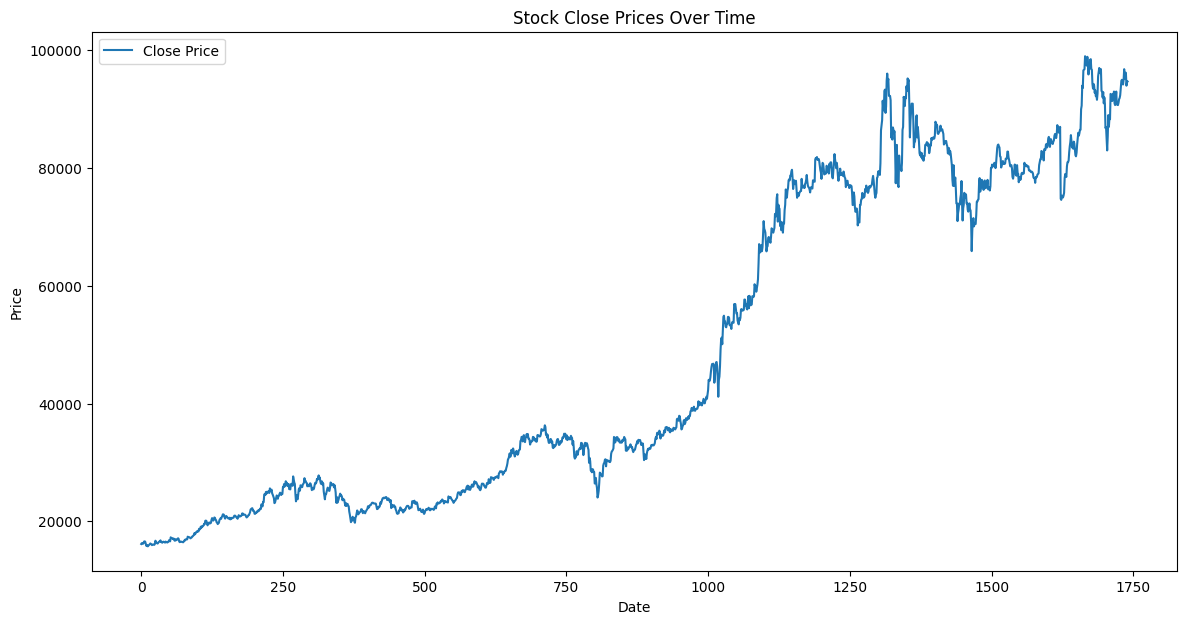

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [4]:
# Chọn 'Close' làm giá trị cần dự đoán
target = data['Close']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(np.array(target).reshape(-1, 1)).reshape(-1)

# Chia dữ liệu thành tập train, test, và validate
train_size = int(len(scaled_target) * 0.7)
test_size = int(len(scaled_target) * 0.2)
train_data, remaining_data = scaled_target[:train_size], scaled_target[train_size:]
test_data, validate_data = train_test_split(remaining_data, test_size=test_size, shuffle=False)


In [5]:
# Chọn 'Close' làm giá trị cần dự đoán
target = data['Close']

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(np.array(target).reshape(-1, 1)).reshape(-1)

# Chia dữ liệu thành tập train, test, và validate
train_size = int(len(scaled_target) * 0.5)
test_size = int(len(scaled_target) * 0.3)
train_data, remaining_data = scaled_target[:train_size], scaled_target[train_size:]
test_data, validate_data = train_test_split(remaining_data, test_size=test_size, shuffle=False)


In [6]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        X.append(a)
        Y.append(dataset[i + time_step])
    return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_validate, y_validate = create_dataset(validate_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_validate = X_validate.reshape(X_validate.shape[0], X_validate.shape[1], 1)


In [7]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100, 1)))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [8]:
model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=32)


Epoch 1/100

25/25 [==============================] - 2s 21ms/step - loss: 0.0020 - val_loss: 0.0048
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 6.6000e-04 - val_loss: 0.0051
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 3.3660e-04 - val_loss: 0.0196
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 4.2467e-04 - val_loss: 0.0023
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 2.6665e-04 - val_loss: 0.0022
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 1.9262e-04 - val_loss: 0.0195
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 2.6931e-04 - val_loss: 0.0050
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 1.8054e-04 - val_loss: 0.0024
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 1.5428e-04 - val_loss: 0.0054
Epoch 10/100
25/25 [==============================] - 0s 9ms/step - l

8/8 [==============================] - 0s 3ms/step
Test MAE: 956.929435483871, Test RMSE: 1276.473482066485, Test MAPE: 1.5603272855124806%


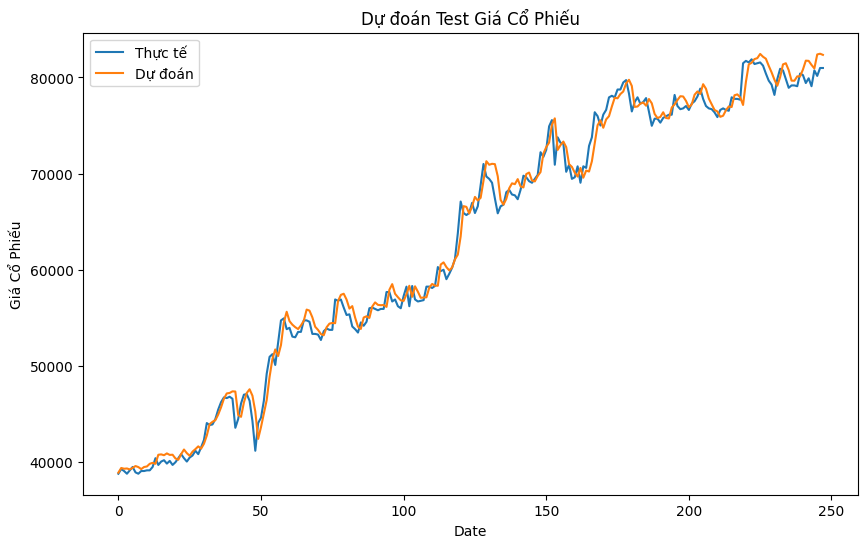

In [9]:
# Dự đoán trên tập test
test_predictions = model.predict(X_test)

# Chuyển đổi dự đoán và giá trị thực tế về dạng ban đầu
test_predictions_inverse = scaler.inverse_transform(test_predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Tính các chỉ số đánh giá
mae_test = mean_absolute_error(y_test_inverse, test_predictions_inverse)
rmse_test = np.sqrt(mean_squared_error(y_test_inverse, test_predictions_inverse))
mape_test = np.mean(np.abs((y_test_inverse - test_predictions_inverse) / y_test_inverse)) * 100

# In kết quả
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}, Test MAPE: {mape_test}%')

# Visualize kết quả
plt.figure(figsize=(10, 6))
plt.plot(y_test_inverse, label='Thực tế')
plt.plot(test_predictions_inverse, label='Dự đoán')
plt.title('Dự đoán Test Giá Cổ Phiếu')
plt.xlabel('Date')
plt.ylabel('Giá Cổ Phiếu')
plt.legend()
plt.show()


14/14 [==============================] - 0s 2ms/step
Validate MAE: 1976.1035480997627, Validate RMSE: 2554.3339789148577, Validate MAPE: 2.398955968684373%


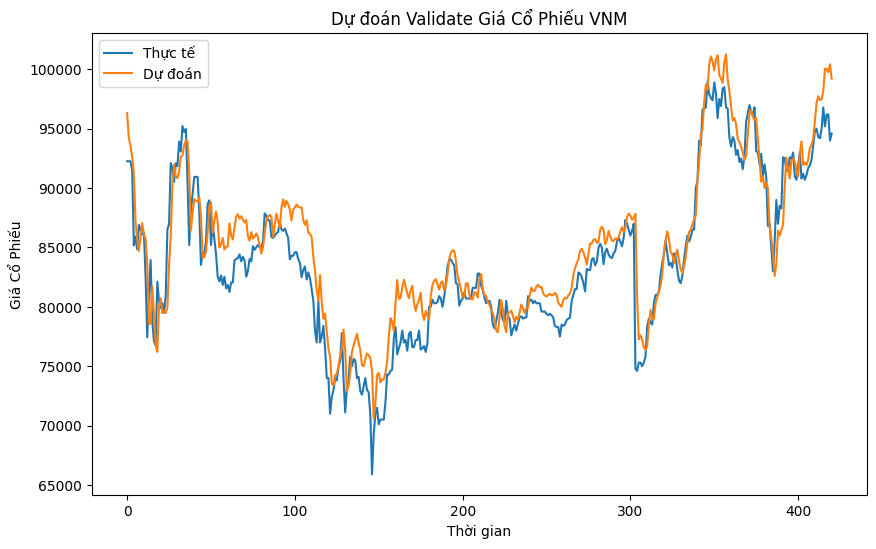

In [10]:
# Dự đoán trên tập validate
validate_predictions = model.predict(X_validate)

# Chuyển đổi dự đoán và giá trị thực tế về dạng ban đầu
validate_predictions_inverse = scaler.inverse_transform(validate_predictions)
y_validate_inverse = scaler.inverse_transform(y_validate.reshape(-1, 1))

# Tính các chỉ số đánh giá
mae_validate = mean_absolute_error(y_validate_inverse, validate_predictions_inverse)
rmse_validate = np.sqrt(mean_squared_error(y_validate_inverse, validate_predictions_inverse))
mape_validate = np.mean(np.abs((y_validate_inverse - validate_predictions_inverse) / y_validate_inverse)) * 100

# In kết quả
print(f'Validate MAE: {mae_validate}, Validate RMSE: {rmse_validate}, Validate MAPE: {mape_validate}%')

# Visualize kết quả
plt.figure(figsize=(10, 6))
plt.plot(y_validate_inverse, label='Thực tế')
plt.plot(validate_predictions_inverse, label='Dự đoán')
plt.title('Dự đoán Validate Giá Cổ Phiếu VNM')
plt.xlabel('Thời gian')
plt.ylabel('Giá Cổ Phiếu')
plt.legend()
plt.show()


In [11]:
# Chuẩn bị dữ liệu đầu vào cho việc dự đoán
last_data = scaled_target[-100:]  # Lấy 100 điểm dữ liệu cuối cùng
current_batch = last_data.reshape((1, 100, 1))

# Dự đoán cho 30 ngày tiếp theo
for i in range(30):
    # Dự đoán cho ngày tiếp theo
    pred_next = model.predict(current_batch)[0]
    # Cập nhật dữ liệu đầu vào
    current_batch = np.append(current_batch[:,1:,:], [[pred_next]], axis=1)

# Chuyển đổi kết quả dự đoán về dạng ban đầu
future_predictions = scaler.inverse_transform(current_batch.reshape(-1, 1))

# In kết quả dự đoán
print(future_predictions[30:])  # In ra 30 giá trị dự đoán mới nhất


1/1 [==============================] - 0s 38ms/step
[[ 86800.        ]
 [ 87000.        ]
 [ 85000.        ]
 [ 83000.        ]
 [ 85400.        ]
 [ 89000.        ]
 [ 87000.        ]
 [ 88500.        ]
 [ 88300.        ]
 [ 92600.        ]
 [ 92500.        ]
 [ 91500.        ]
 [ 91400.        ]
 [ 92600.        ]
 [ 92400.        ]
 [ 93000.        ]
 [ 91000.        ]
 [ 90700.        ]
 [ 91900.        ]
 [ 93000.        ]
 [ 90800.        ]
 [ 91200.        ]
 [ 90700.        ]
 [ 91100.        ]
 [ 91700.        ]
 [ 91900.        ]
 [ 92400.        ]
 [ 93600.        ]
 [ 94800.        ]
 [ 95000.        ]
 [ 94300.        ]
 [ 94200.        ]
 [ 95000.        ]
 [ 96800.        ]
 [ 95200.        ]
 [ 96200.        ]
 [ 96200.        ]
 [ 94000.        ]
 [ 94600.        ]
 [ 94700.        ]
 [ 99050.04947239]
 [101428.87262143]
 [104572.51520051]
 [106922.10231483]
 [109232.68159457]
 [111663.98476521]
 [113943.11571443]
 [116706.91801622]
 [119791.76114577]
 [122060.39609067

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


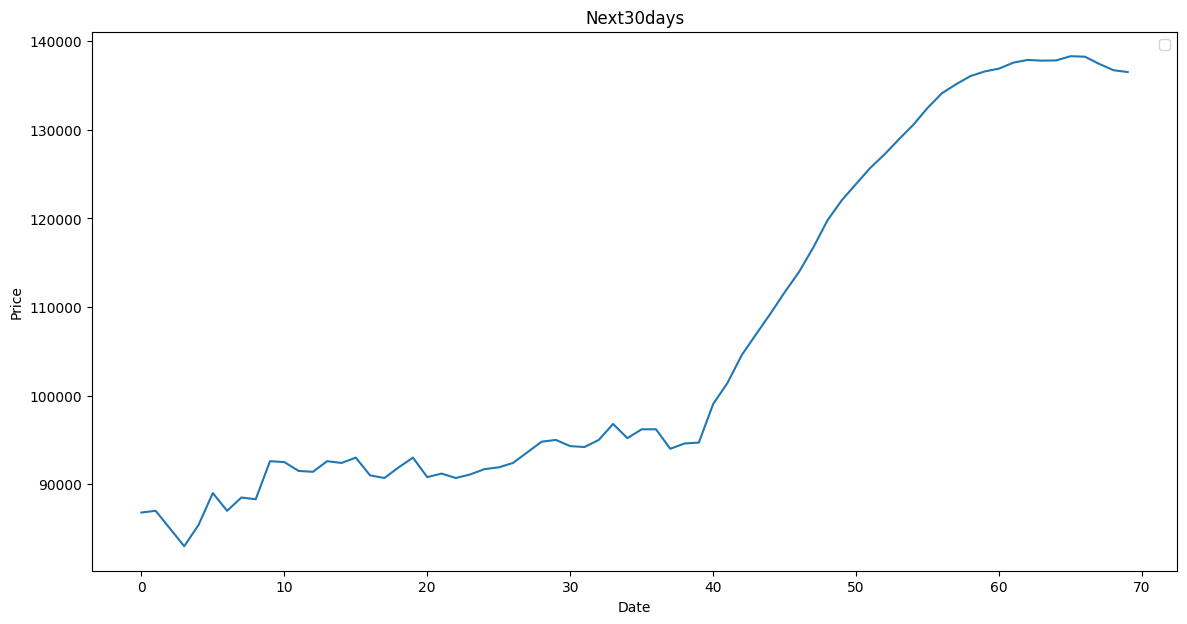

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(future_predictions[30:])
plt.title('Next30days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
